# Explore here

In [61]:
# Your code here
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.to_csv("../data/raw/data_raw.csv", index=False)
data.info()
data_uniques = data.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
data_uniques.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<Axes: ylabel='charges'>

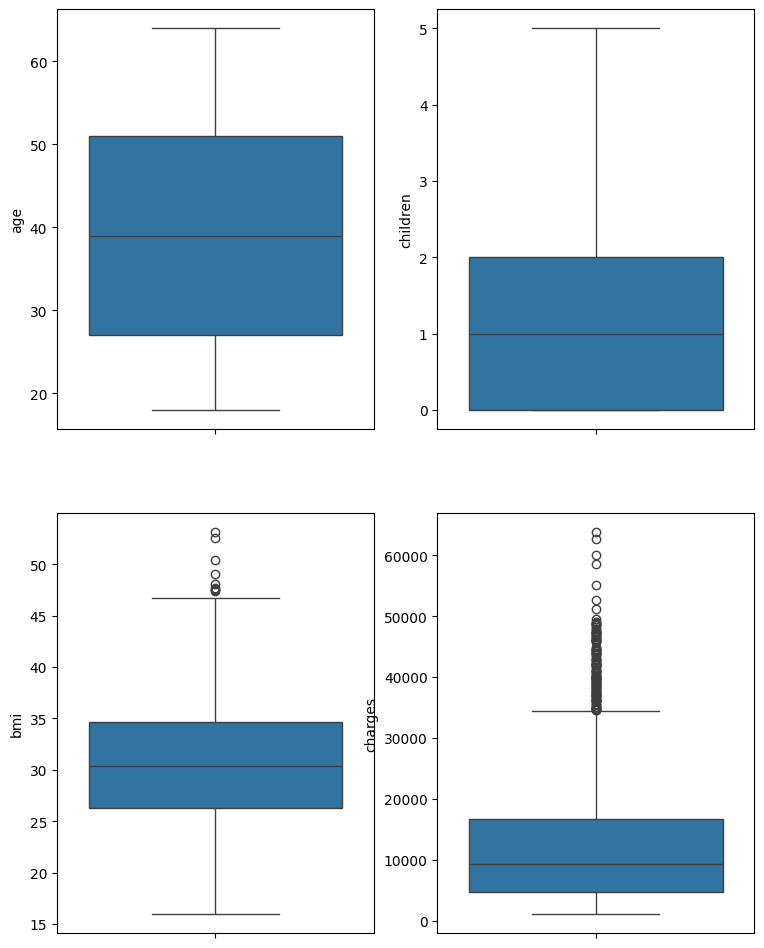

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,2,figsize=(9,12))
sns.boxplot(ax=axis[0,0],data=data_uniques["age"])
sns.boxplot(ax=axis[1,0],data=data_uniques["bmi"])
sns.boxplot(ax=axis[0,1],data=data_uniques["children"])
sns.boxplot(ax=axis[1,1],data=data_uniques["charges"])

In [64]:
col = ["bmi","charges"]
def eliminar_atipicos(datos, columnas):
    new_data = datos
    for i in columnas:
        q1=new_data[i].quantile(0.25)
        q3=new_data[i].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 0.8*iqr
        hi_lim = q3 + 0.8*iqr
        new_data = new_data[(new_data[i] <= hi_lim) & (new_data[i] >= low_lim)]
    return new_data.copy()

data_num_clean = eliminar_atipicos(data_uniques,col)

<Axes: ylabel='charges'>

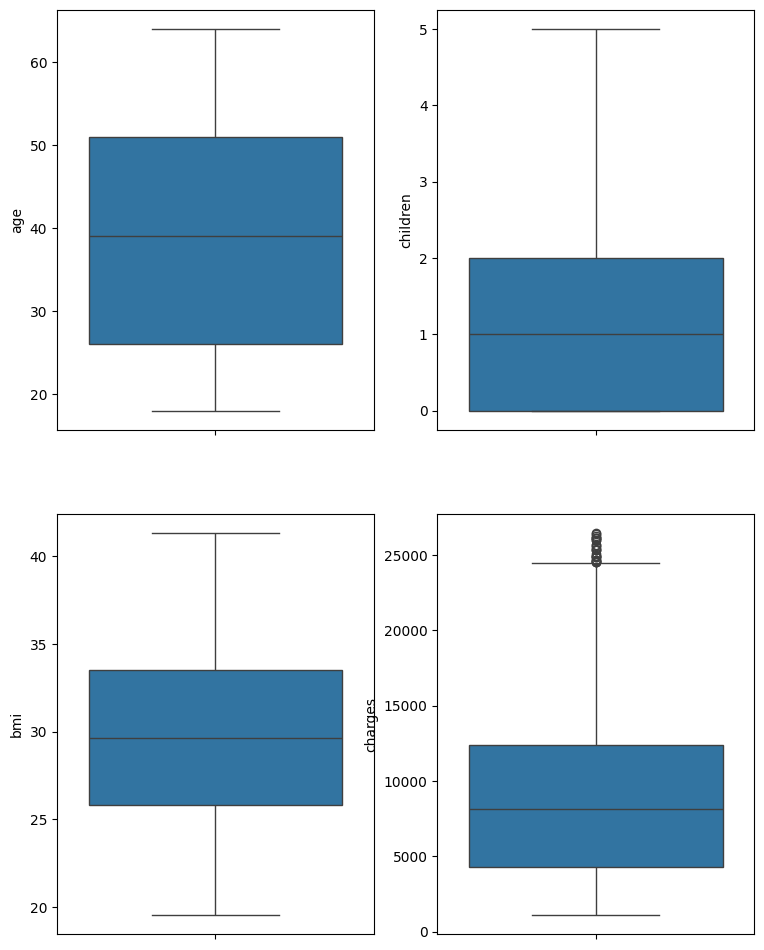

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,2,figsize=(9,12))
sns.boxplot(ax=axis[0,0],data=data_num_clean["age"])
sns.boxplot(ax=axis[1,0],data=data_num_clean["bmi"])
sns.boxplot(ax=axis[0,1],data=data_num_clean["children"])
sns.boxplot(ax=axis[1,1],data=data_num_clean["charges"])

<Axes: >

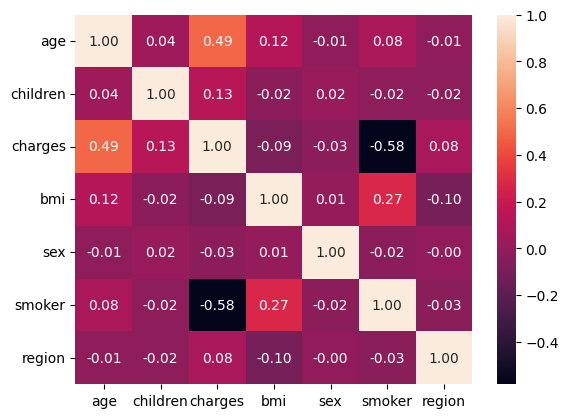

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import seaborn as sns

col = ["age","children","charges","bmi"]
new_data = data_num_clean[col]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(new_data[col])
df_scal = pd.DataFrame(scal_features, index = new_data.index, columns = col)

df_scal["sex"] = pd.factorize(data_num_clean["sex"])[0]
df_scal["smoker"] = pd.factorize(data_num_clean["smoker"])[0]
df_scal["region"] = pd.factorize(data_num_clean["region"])[0]
sns.heatmap(df_scal.corr(), annot = True, fmt = ".2f")


In [67]:
X = df_scal[["smoker","age","children"]]
Y = data_num_clean["charges"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=31)

model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = r2_score(y_test, y_pred)
print(score)

0.562792409024824


In [68]:
x_train.to_csv("../data/processed/x_train.csv", index=False)
x_test.to_csv("../data/processed/x_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)